<a href="https://colab.research.google.com/github/Sarasswati/Zomato_Restaurant_Clustering_Sentiment_Analysis/blob/main/ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import missingno as msno
warnings.filterwarnings('ignore')

from wordcloud import WordCloud

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
working_directory = '/content/drive/MyDrive/Colab Notebooks/Capstone_Project_4/Zomato_Restaurant_Clustering_and_Sentiment_Analysis/'
zname_df = pd.read_csv(working_directory + 'Zomato Restaurant names and Metadata.csv')
zreview_df = pd.read_csv(working_directory + 'Zomato Restaurant reviews.csv')

In [ ]:
zname_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
zname_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [ ]:
zname_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [ ]:
zname_df.duplicated().sum()

0

In [ ]:
# Checking duplicate restaurant name
zname_df['Name'].duplicated().sum()

0

In [ ]:
# Checking unique restaurant names
zname_df['Name'].nunique()

105

In [ ]:
# Changing cost function's data type
zname_df['Cost'] =  zname_df['Cost'].str.replace(",","").astype('int64')

# EDA on Zomato Restaurant Dataset

In [ ]:
# Top 10 costly Restaurants
top_10_costly = zname_df[['Name', 'Cost']].groupby('Name', as_index=False).sum().sort_values(by='Cost',ascending=False).head(10)

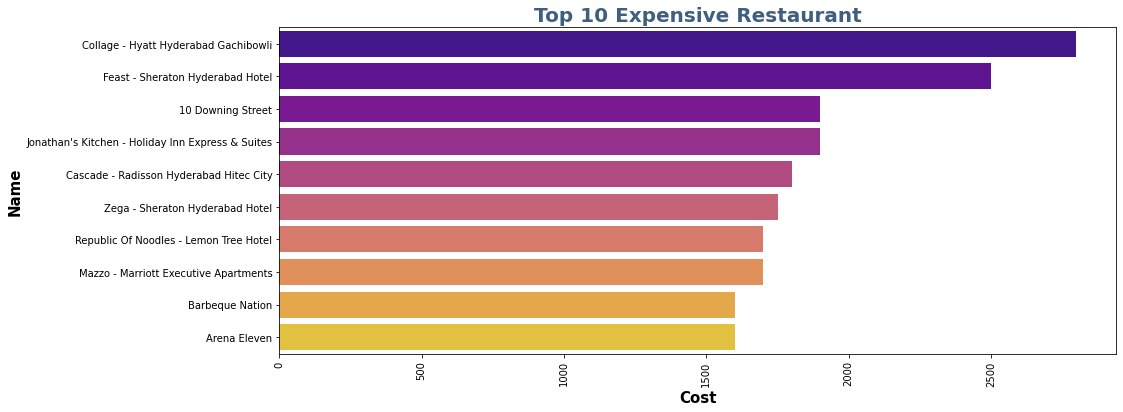

In [ ]:
plt.figure(figsize=(15,6))
x = top_10_costly['Cost']
y = top_10_costly['Name']
plt.title("Top 10 Expensive Restaurant",fontsize=20,weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("Cost",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='plasma')
plt.show()

In [ ]:
# Top 10 affordable Restaurants
top_10_affordable = zname_df[['Name', 'Cost']].groupby('Name', as_index=False).sum().sort_values(by='Cost',ascending=True).tail(10)

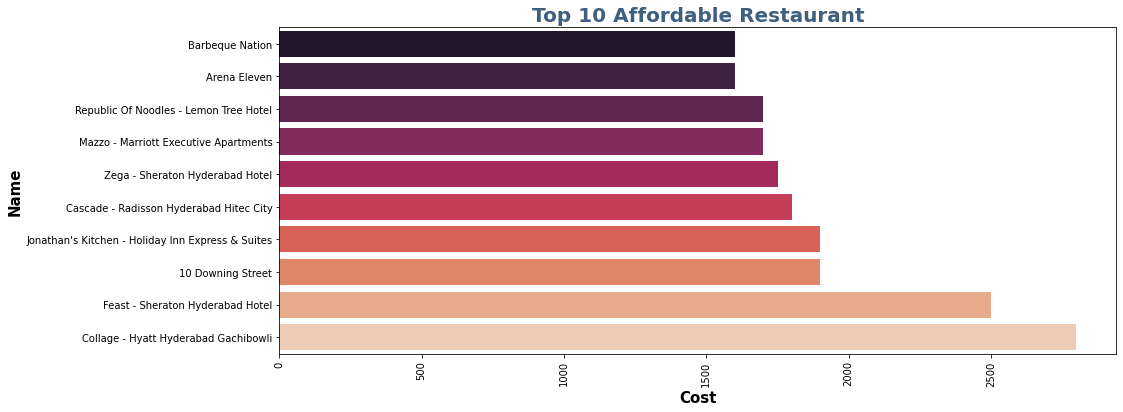

In [ ]:
plt.figure(figsize=(15,6))
x = top_10_affordable['Cost']
y = top_10_affordable['Name']
plt.title("Top 10 Affordable Restaurant",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("Cost",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y, palette='rocket')
plt.show()

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')

In [ ]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
# Removing stopwords from Cuisines
zname_df['Cuisines'] = zname_df['Cuisines'].apply(lambda text: stopwords(text))
zname_df['Cuisines'].head()

0    chinese, continental, kebab, european, south i...
1                       biryani, north indian, chinese
2         asian, mediterranean, north indian, desserts
3    biryani, north indian, chinese, seafood, bever...
4    asian, continental, north indian, chinese, med...
Name: Cuisines, dtype: object

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
# Removing punctuations from Cuisines
zname_df['Cuisines'] = zname_df['Cuisines'].apply(lambda x: remove_punctuation(x))
zname_df['Cuisines'].head()

0    chinese continental kebab european south india...
1                         biryani north indian chinese
2            asian mediterranean north indian desserts
3       biryani north indian chinese seafood beverages
4    asian continental north indian chinese mediter...
Name: Cuisines, dtype: object

In [ ]:
import re
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

In [ ]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [ ]:
# Removing repeating characters from Cuisines
zname_df['Cuisines'] = zname_df['Cuisines'].apply(lambda x: cleaning_repeating_char(x))
zname_df['Cuisines'] = zname_df['Cuisines'].apply(lambda x: cleaning_numbers(x))

In [ ]:
from collections import Counter 
text = ' '.join(zname_df['Cuisines'])
words = text.split()

two_words = {' '.join(words):n for words,n in Counter(zip(words, words[1:])).items() if not  words[0][-1]==(',')}

In [ ]:
word_freq = pd.DataFrame(two_words.items(), columns=['Cuisine_Words', 'Frequency'])
word_freq = word_freq.sort_values(by = "Frequency", ascending = False)
word_freq_20 = word_freq[:20]

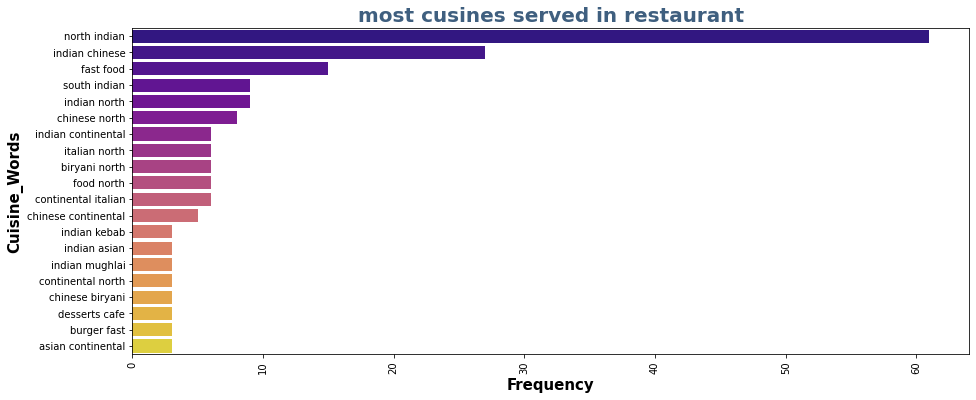

In [ ]:
# most cusines served in restaurant
plt.figure(figsize=(15,6))
y = word_freq_20['Cuisine_Words']
x = word_freq_20['Frequency']
plt.title("most cusines served in restaurant",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Cuisine Words",weight='bold',fontsize=15)
plt.xlabel("Frequency",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette="plasma")
plt.show()

In [ ]:
zreview_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [ ]:
zreview_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [ ]:
zreview_df.loc[zreview_df['Rating'] == 'Like'] = np.nan
zreview_df['Rating']= zreview_df['Rating'].astype('float64')

In [ ]:
print(zreview_df['Rating'].mean())

3.601044071880333


In [ ]:
zreview_df['Rating'].fillna(3.6, inplace=True)

In [ ]:
# split metadata column into 2 columns i.e. Reviews and followers
zreview_df['Reviews'], zreview_df['Followers'] = zreview_df['Metadata'].str.split(',').str
zreview_df['Reviews'] = pd.to_numeric(zreview_df['Reviews'].str.split(' ').str[0])

In [ ]:
# Converting Time column into Time, Year, Month, Hour
zreview_df['Time'] = pd.to_datetime(zreview_df['Time'])
zreview_df['Year'] = pd.DatetimeIndex(zreview_df['Time']).year
zreview_df['Month'] = pd.DatetimeIndex(zreview_df['Time']).month
zreview_df['Hour'] = pd.DatetimeIndex(zreview_df['Time']).hour
zreview_df = zreview_df.drop(['Metadata'], axis =1)

In [ ]:
zreview_df.isnull().sum()

Restaurant       1
Reviewer        39
Review          46
Rating           0
Time            39
Pictures         1
Reviews         39
Followers     1617
Year            39
Month           39
Hour            39
dtype: int64

In [ ]:
# Replacing followers and reviews null values into 0
zreview_df['Followers'].fillna(0,inplace=True)
zreview_df['Reviews'].fillna(0,inplace=True)

In [ ]:
# Dropping the remaining missing data
zreview_df.dropna(inplace=True)
zreview_df.reset_index(inplace = True)

In [ ]:
zreview_df.describe()

,index,Rating,Pictures,Reviews,Year,Month,Hour
count,9954.000000,9954.000000,9954.000000,9954.000000,9954.000000,9954.000000,9954.000000
mean,4983.199920,3.600261,0.751959,24.007937,2018.452381,6.017079,15.183946
std,2882.485546,1.483573,2.575819,50.631674,0.562566,3.160515,6.580345
min,0.000000,1.000000,0.000000,0.000000,2016.000000,1.000000,0.000000
25%,2489.250000,3.000000,0.000000,1.000000,2018.000000,4.000000,12.000000
50%,4977.500000,4.000000,0.000000,4.000000,2018.000000,5.000000,16.000000
75%,7468.750000,5.000000,0.000000,22.000000,2019.000000,8.000000,21.000000
max,9999.000000,5.000000,64.000000,1031.000000,2019.000000,12.000000,23.000000


# EDA on reviews dataset

Text(0.5, 0, 'Ratings')

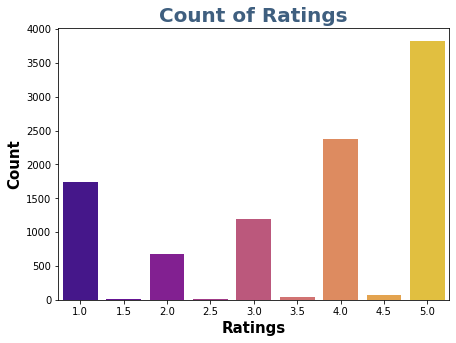

In [ ]:
# Countplot of Ratings
plt.figure(figsize=(7,5))
sns.countplot(zreview_df['Rating'],palette="plasma")
plt.title("Count of Ratings",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Count",weight='bold',fontsize=15)
plt.xlabel("Ratings",weight='bold',fontsize=15)

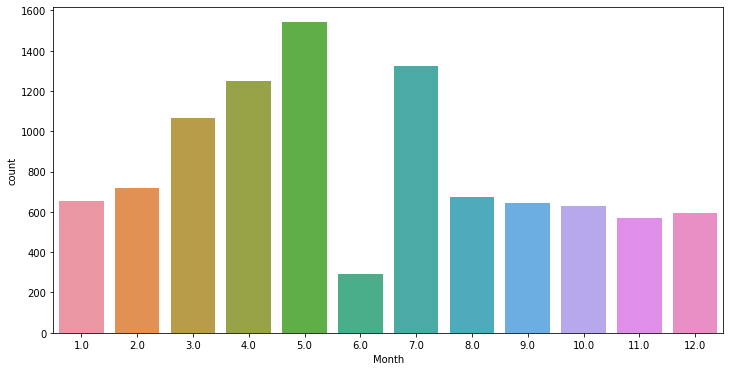

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(zreview_df.Month)

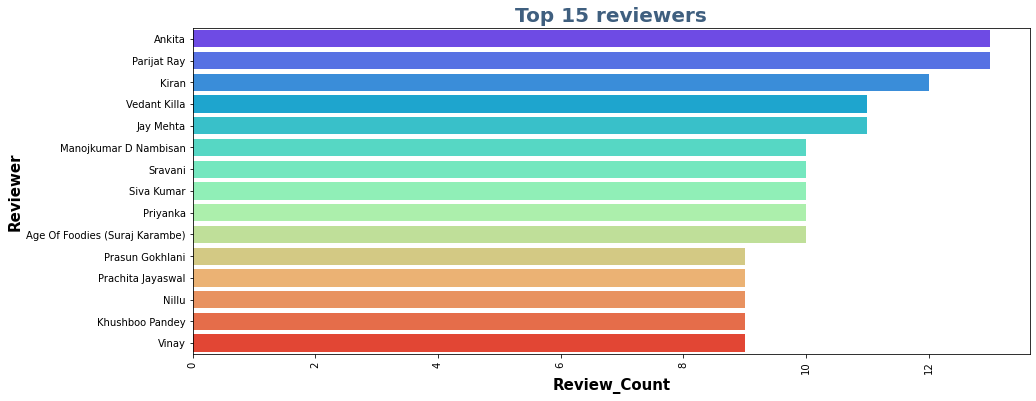

In [ ]:
reviewer_list = zreview_df.groupby('Reviewer').apply(lambda x: x['Reviewer'].count()).reset_index(name='Review_Count')
reviewer_list = reviewer_list.sort_values(by = 'Review_Count',ascending=False)
top_reviewers = reviewer_list[:15]

# top reviewers that have more review
plt.figure(figsize=(15,6))
x = top_reviewers['Review_Count']
y = top_reviewers['Reviewer']
plt.title("Top 15 reviewers",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("No. of Reviews",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='rainbow')
plt.show()

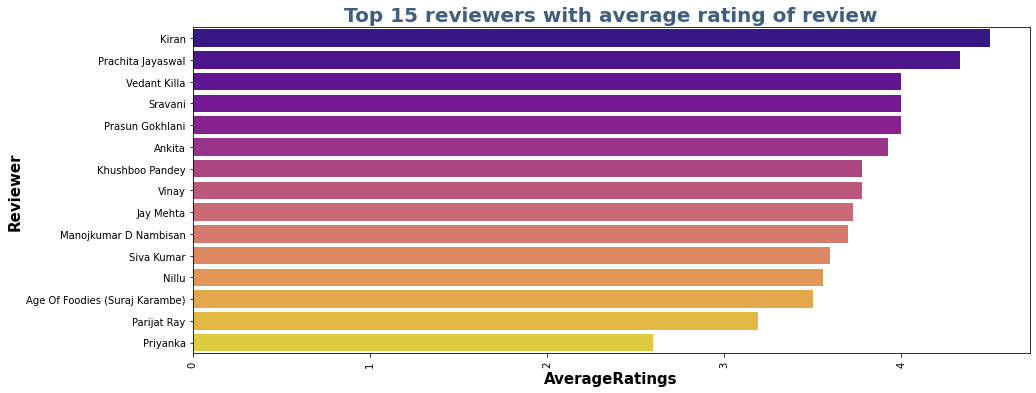

In [ ]:
# Average of the ratings of reviewers with review count
review_ratings = zreview_df.groupby('Reviewer').apply(lambda x:np.average(x['Rating'])).reset_index(name='AverageRatings')
review_ratings = pd.merge(top_reviewers,review_ratings,how='inner',left_on='Reviewer',right_on='Reviewer')
top_reviewers_ratings = review_ratings[:15]
top_reviewers_ratings = top_reviewers_ratings.sort_values(by = 'AverageRatings',ascending=False)

plt.figure(figsize=(15,6))
x = top_reviewers_ratings['AverageRatings']
y = top_reviewers_ratings['Reviewer']
plt.title("Top 15 reviewers with average rating of review",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("Average Rating",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='plasma')
plt.show()

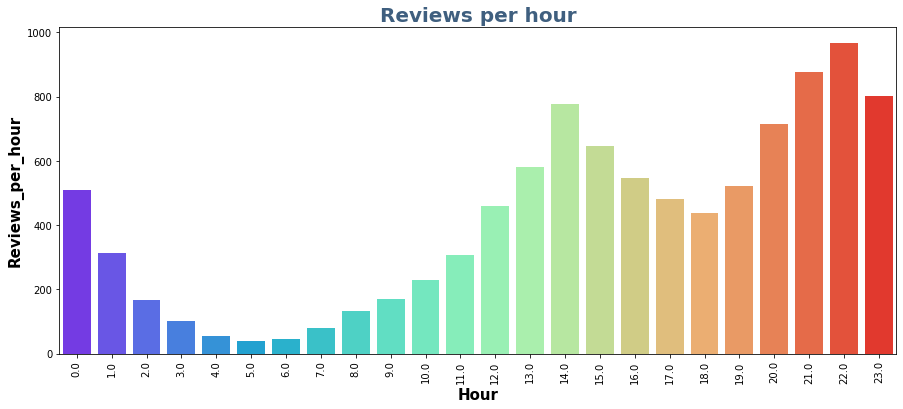

In [ ]:
# Review per hour
reviews_hour = zreview_df.groupby('Hour').apply(lambda x: x['Hour'].count()).reset_index(name='Reviews_per_hour')

plt.figure(figsize=(15,6))
x = reviews_hour['Hour']
y = reviews_hour['Reviews_per_hour']
plt.title("Reviews per hour",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Reviews per hour",weight='bold',fontsize=15)
plt.xlabel("Hour",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='rainbow')
plt.show()

#### As we can se there is an increase of reviews made from the afternoon to the midnight and then in the morning there is a decrease

## Text Cleaning

In [ ]:
zreview_df['Review'] = zreview_df['Review'].apply(remove_punctuation)
zreview_df['Review'] = zreview_df['Review'].apply(stopwords)

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
def lemmatization_(text):
  for index,x in enumerate(text):
    doc = nlp(x)  
    l=list()
    for word in doc:
        l.append(word.lemma_)
    text[index]=' '.join(l)
  return text

In [ ]:
review = zreview_df.Review
review = lemmatization_(review)

In [ ]:
# remove_all_extra_spaces
def remove_spaces (text):
  '''removes all extra space from the text
  '''
  for index,x in enumerate(text):
    text[index]=" ".join(x.split())
  return text

In [ ]:
review = remove_spaces(review)

In [ ]:
# Remove non letters
import re
regex = re.compile('[^a-zA-Z]')
def remove_non_leters(text):
  '''used to remove all non leters form the list 
  '''
  text=[regex.sub(' ', x) for x in text]
  return text

In [ ]:
review = remove_non_leters(review)
# storing the reviews in a feature of df
zreview_df['Review'] = review
zreview_df.head()

,index,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,0,Beyond Flavours,Rusha Chakraborty,ambience good food quite good saturday lunch c...,5.0,2019-05-25 15:54:00,0.0,1.0,2 Followers,2019.0,5.0,15.0
1,1,Beyond Flavours,Anusha Tirumalaneedi,ambience good pleasant evening service prompt ...,5.0,2019-05-25 14:20:00,0.0,3.0,2 Followers,2019.0,5.0,14.0
2,2,Beyond Flavours,Ashok Shekhawat,must try great food great ambience thnx servic...,5.0,2019-05-24 22:54:00,0.0,2.0,3 Followers,2019.0,5.0,22.0
3,3,Beyond Flavours,Swapnil Sarkar,soumen das arun great guy behavior sincerety g...,5.0,2019-05-24 22:11:00,0.0,1.0,1 Follower,2019.0,5.0,22.0
4,4,Beyond Flavours,Dileep,food goodwe order kodi drumstick basket mutton...,5.0,2019-05-24 21:37:00,0.0,3.0,2 Followers,2019.0,5.0,21.0


## Sentiment Analysis

In [ ]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import plotly.express as px

In [ ]:
# Function to get the subjectivity
def subjectivity(text): 
    return TextBlob(text).sentiment.subjectivity

In [ ]:
# Function to get the polarity
def polarity(text): 
    return TextBlob(text).sentiment.polarity

In [ ]:
# Creating two new columns from Review
zreview_df['Subjectivity'] = zreview_df['Review'].apply(subjectivity)
zreview_df['Polarity'] = zreview_df['Review'].apply(polarity)

In [ ]:
# Function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score <0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [ ]:
zreview_df['Analysis'] = zreview_df['Polarity'].apply(getAnalysis)

In [ ]:
# plot the polarity and subjectivity
fig = px.scatter(zreview_df, 
                 x='Polarity', 
                 y='Subjectivity', 
                 color = 'Analysis',
                 size='Subjectivity')

#add a vertical line at x=0 for Netural Reviews
fig.update_layout(title='Sentiment Analysis',
                  shapes=[dict(type= 'line',
                               yref= 'paper', y0= 0, y1= 1, 
                               xref= 'x', x0= 0, x1= 0)])
fig.show()

#### The x-axis shows polarity, and y-axis shows subjectivity. Polarity tells how positive or negative the text is. The subjectivity tells how subjective or opinionated the text is

In [ ]:
# Converting Analysis into numeric form Postive=0 and Negative =1
def sentiment(analysis):
  if analysis == 'Positive':
    return 0
  elif analysis == 'Neutral' :
    return 0
    # positive sentiment
  else:
    return 1
    # neagative sentiment

In [ ]:
zreview_df['Analysis'] = zreview_df['Analysis'].apply(lambda x:sentiment(x))

In [ ]:
sentiment_df = zreview_df[['Review','Rating','Analysis']]
sentiment_df.head()

,Review,Rating,Analysis
0,ambience good food quite good saturday lunch c...,5.0,0
1,ambience good pleasant evening service prompt ...,5.0,0
2,must try great food great ambience thnx servic...,5.0,0
3,soumen das arun great guy behavior sincerety g...,5.0,0
4,food goodwe order kodi drumstick basket mutton...,5.0,0


In [ ]:
# Number of restaurants with good rating
ratings_data[ratings_data.Rating > 4].count() 

Rating             18
Number of votes    18
dtype: int64

In [ ]:
# Top 10 Restaurants with rating and count of votes
ratings_data = pd.DataFrame(zreview_df.groupby('Restaurant')['Rating'].mean())
ratings_data['Number of votes'] = zreview_df.groupby('Restaurant')['Rating'].count()
ratings_data.sort_values(by=['Rating'], ascending=False).head(10)

,Rating,Number of votes
Restaurant,,
AB's - Absolute Barbecues,4.88,100
B-Dubs,4.81,100
"3B's - Buddies, Bar & Barbecue",4.76,100
Paradise,4.70,100
Flechazo,4.66,100
The Indi Grill,4.60,100
Zega - Sheraton Hyderabad Hotel,4.45,100
Over The Moon Brew Company,4.34,100
Beyond Flavours,4.28,100


In [ ]:
X = sentiment_df['Review']
y = sentiment_df['Analysis']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=sentiment_df['Analysis'])

In [ ]:
# creating tokens for text data
from sklearn.feature_extraction.text import  TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

### Multinomial Naive Bayes

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score, classification_report, f1_score
from sklearn.naive_bayes import MultinomialNB
# creating MultinomialNB model
model = MultinomialNB()

In [ ]:
#training the model
model.fit(X_train,y_train)

MultinomialNB()

In [ ]:
#predicting the values of y from x via model
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
def model_details(x_train, y_train, y_test, y_pred_train, y_pred_test):
  # Accuracy
  print('-'*50)
  train_accuracy = accuracy_score(y_train,y_pred_train)
  print('Train accuracy is:',train_accuracy)
  test_accuracy = accuracy_score(y_test,y_pred_test)
  print('Test accuracy is:',test_accuracy)
  print('-'*50)
  confusion_mat = confusion_matrix(y_pred_test, y_test)
  print("The confusion matrix on the test data is :")
  print(confusion_mat)
  print('-'*50)
  MSE = round(mean_squared_error(y_train, y_pred_train), 4)
  RMSE = (np.sqrt(MSE))
  R2 = (r2_score(y_true=y_train, y_pred=y_pred_train))
  Adjusted_R2 = (1-(1-r2_score(y_train, y_pred_train))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)))
  print("MSE :", MSE)
  print("RMSE :", RMSE)
  print("R2 :", R2)
  print("Adjusted R2 :", Adjusted_R2)
  classification_rep= classification_report(y_pred_test, y_test)
  
  print("The classification report on the train data is :")
  print(classification_rep)

In [ ]:
model_details(X_train, y_train, y_test, y_pred_train, y_pred_test)

--------------------------------------------------
Train accuracy is: 0.8393837910247823
Test accuracy is: 0.8248292486942547
--------------------------------------------------
The confusion matrix on the test data is :
[[2022  435]
 [   1   31]]
--------------------------------------------------
MSE : 0.1606
RMSE : 0.40074929819027755
R2 : -0.055861651934246304
Adjusted R2 : 2.3207560532993488
The classification report on the train data is :
              precision    recall  f1-score   support

           0       1.00      0.82      0.90      2457
           1       0.07      0.97      0.12        32

    accuracy                           0.82      2489
   macro avg       0.53      0.90      0.51      2489
weighted avg       0.99      0.82      0.89      2489



### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf= RandomForestClassifier()

In [ ]:
grid_values_rf = {'n_estimators': [100,150],'max_depth': [10,15],'criterion': ['entropy']}
rfc = GridSearchCV(estimator=rf,param_grid = grid_values_rf, scoring='recall',cv=5,verbose=5,n_jobs=-1)
rfc.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [10, 15],
                         'n_estimators': [100, 150]},
             scoring='recall', verbose=5)

In [ ]:
random_y_pred_train=rfc.predict(X_train)
random_y_pred_test=rfc.predict(X_test)

In [ ]:
model_details(X_train, y_train, y_test, random_y_pred_train, random_y_pred_test)

--------------------------------------------------
Train accuracy is: 0.8194239785666444
Test accuracy is: 0.8143832864604259
--------------------------------------------------
The confusion matrix on the test data is :
[[2023  462]
 [   0    4]]
--------------------------------------------------
MSE : 0.1806
RMSE : 0.42497058721751557
R2 : -0.187073817187126
Adjusted R2 : 2.484886705460819
The classification report on the train data is :
              precision    recall  f1-score   support

           0       1.00      0.81      0.90      2485
           1       0.01      1.00      0.02         4

    accuracy                           0.81      2489
   macro avg       0.50      0.91      0.46      2489
weighted avg       1.00      0.81      0.90      2489



### XGB Classifier

In [ ]:
from xgboost import XGBClassifier
xgbc=XGBClassifier()

In [ ]:
# finding the best parameters for XGBRegressor by gridsearchcv
xgbc_param={'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}
xgbc_grid=GridSearchCV(estimator=xgbc,param_grid=xgbc_param,cv=3,scoring='recall',verbose=5,n_jobs=-1)
xgbc_grid.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [7, 10, 15],
                         'n_estimators': [100, 125, 150]},
             scoring='recall', verbose=5)

In [ ]:
xgb_y_pred_train=xgbc_grid.predict(X_train)
xgb_y_pred_test=xgbc_grid.predict(X_test)

In [ ]:
model_details(X_train, y_train, y_test, xgb_y_pred_train, xgb_y_pred_test)

--------------------------------------------------
Train accuracy is: 0.9898191560616209
Test accuracy is: 0.937324226597027
--------------------------------------------------
The confusion matrix on the test data is :
[[1978  111]
 [  45  355]]
--------------------------------------------------
MSE : 0.0102
RMSE : 0.10099504938362078
R2 : 0.9330729895354439
Adjusted R2 : 1.0837176480823607
The classification report on the train data is :
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2089
           1       0.76      0.89      0.82       400

    accuracy                           0.94      2489
   macro avg       0.87      0.92      0.89      2489
weighted avg       0.94      0.94      0.94      2489



### Support Vector Machine

In [ ]:
from sklearn import svm
svm_clf = svm.SVC(probability=True)

In [ ]:
svm_clf.fit(X_train, y_train)

SVC(probability=True)

In [ ]:
svm_y_train_pred = svm_clf.predict(X_train)  
svm_y_test_pred = svm_clf.predict(X_test) 

In [ ]:
model_details(X_train, y_train, y_test, svm_y_train_pred, svm_y_test_pred)

--------------------------------------------------
Train accuracy is: 0.9958472873409243
Test accuracy is: 0.9268782643631981
--------------------------------------------------
The confusion matrix on the test data is :
[[1999  158]
 [  24  308]]
--------------------------------------------------
MSE : 0.0042
RMSE : 0.0648074069840786
R2 : 0.972700824678931
Adjusted R2 : 1.0341479880335946
The classification report on the train data is :
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      2157
           1       0.66      0.93      0.77       332

    accuracy                           0.93      2489
   macro avg       0.82      0.93      0.86      2489
weighted avg       0.94      0.93      0.93      2489



## Model Comparison

In [ ]:
Comparision_dict = {'Model_Name':['MultinomialNB', 'Random Forest', 'XGB', 'SVM'],
                  'Training_accuracy':[0.8397,0.8176,0.988,0.99],
                  'Test_accuracy':[0.8264,0.8123,0.9280,0.9212]} 

In [ ]:
Comparisione_df = pd.DataFrame(Comparision_dict)
Comparisione_df

,Model_Name,Training_accuracy,Test_accuracy
0,MultinomialNB,0.8397,0.8264
1,Random Forest,0.8176,0.8123
2,XGB,0.9880,0.9280
3,SVM,0.9900,0.9212


In [ ]:
Comparision_dict2 = {'Model_Name':['MultinomialNB', 'Random Forest', 'XGB', 'SVM'],
                  'MSE':[0.1606,0.1806,0.0102,0.0042],
                  'RMSE':[0.40,0.425,0.10,0.06],
                  'R2':[-0.056,-0.187,0.933,0.973]}
Comparisione_df2 = pd.DataFrame(Comparision_dict2)
Comparisione_df2

,Model_Name,MSE,RMSE,R2
0,MultinomialNB,0.1606,0.400,-0.056
1,Random Forest,0.1806,0.425,-0.187
2,XGB,0.0102,0.100,0.933
3,SVM,0.0042,0.060,0.973


### LDA of Reviews

In [ ]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 22.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=103838a7fe02638e1206db78501173276d14d02cbb9f58a14e84439aa7e3d2f7
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=c41a79b144a75cd663700ea7c399d396c78e70a473f702f4e9003b8e7fad9ed6
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyLDAvis sklearn


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working

/usr/local/lib/python3.8/dist-packages/past/builtins/misc.py:4: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working



In [ ]:
docs_raw = zreview_df['Review'].tolist()

In [ ]:
#Transform text to vector form using the vectorizer object 
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{10,}\b', # num chars > 3 to avoid some meaningless words
                                max_df = 0.9,                        # discard words that appear in > 90% of the reviews
                                min_df = 10) 

In [ ]:
#apply transformation
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())

In [ ]:
dtm_tfidf = tfidf_vectorizer.fit_transform(docs_raw) 

In [ ]:
print("The shape of the tfidf is {}, meaning that there are {} {} and {} tokens made through the filtering process.".\
              format(dtm_tfidf.shape,dtm_tfidf.shape[0], zreview_df['Review'], dtm_tfidf.shape[1]))

The shape of the tfidf is (9954, 136), meaning that there are 9954 0       ambience good food quite good saturday lunch c...
1       ambience good pleasant evening service prompt ...
2       must try great food great ambience thnx servic...
3       soumen das arun great guy behavior sincerety g...
4       food goodwe order kodi drumstick basket mutton...
                              ...                        
9949    madhumathi mahajan well start nice courteous s...
9950    place never disappoint we food courteous staff...
9951    bad rating mainly chicken bone find veg food a...
9952    personally love prefer chinese food couple tim...
9953    check try delicious chinese food see nonveg lu...
Name: Review, Length: 9954, dtype: object and 136 tokens made through the filtering process.


In [ ]:
# Define Search Param
search_params = {'n_components': [5, 10, 15, 20, 25, 30], 
                  'learning_decay': [.5, .7, .9]}

In [ ]:
# Init the Model
lda = LatentDirichletAllocation()

In [ ]:
model = GridSearchCV(lda, param_grid=search_params)

In [ ]:
model.fit(dtm_tfidf)

GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [5, 10, 15, 20, 25, 30]})

In [ ]:
best_lda_model = model.best_estimator_

In [ ]:
# Topic Modelling Visualization for the Negative Reviews
pyLDAvis.sklearn.prepare(best_lda_model, dtm_tfidf, tfidf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.372808  0.155175       1        1  22.651876
1     -0.259508  0.286738       2        1  21.582094
2     -0.092047 -0.020582       3        1  19.133294
0     -0.062538 -0.308797       4        1  18.669738
3      0.041285 -0.112535       5        1  17.962998, topic_info=            Term        Freq       Total Category  logprob  loglift
111   restaurant  667.000000  667.000000  Default  30.0000  30.0000
60    experience  645.000000  645.000000  Default  29.0000  29.0000
42    definitely  303.000000  303.000000  Default  28.0000  28.0000
64    gachibowli  253.000000  253.000000  Default  27.0000  27.0000
56    especially  213.000000  213.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
77    innovative    8.862140    9.638872   Topic5  -4.7622   1.6328
82    maincourse    8.357214    9.135985   Topic5  -4.8209   1.6278
25   combination   43.606923   48.457630   Topic5  -3.1688   1.6114
8    anniversary    4.605527   16.807374   Topic5  -5.4168   0.4223
108  requirement    1.944547   10.964854   Topic5  -6.2790  -0.0128

[190 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
0         1  0.989852      absolutely
1         5  0.926983      acceptable
2         4  0.910168      accessible
3         1  0.940675     accommodate
4         1  0.930674   accompaniment
...     ...       ...             ...
131       1  0.955172   unfortunately
132       4  0.919349      unhygienic
133       5  0.963869  unprofessional
134       3  0.991839      vegetarian
135       3  0.924739     vegetarians

[146 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 3, 1, 4])

## Clustering

In [ ]:
# converting the cuisines to lower case
zname_df['Cuisines'] = zname_df['Cuisines'].apply(lambda x : x.lower())

In [ ]:
cuisine_df = zname_df.loc[:,['Name', 'Cost', 'Cuisines']]

In [ ]:
cuisine_df['Cuisines'] = cuisine_df['Cuisines'].str.replace(' ','')
cuisine_df['Cuisines'] = cuisine_df['Cuisines'].str.split(',')

In [ ]:
cuisine_df.head()

,Name,Cost,Cuisines
0,Beyond Flavours,800,[chinesecontinentalkebabeuropeansouthindiannor...
1,Paradise,800,[biryaninorthindianchinese]
2,Flechazo,1300,[asianmediterraneannorthindiandesserts]
3,Shah Ghouse Hotel & Restaurant,800,[biryaninorthindianchineseseafoodbeverages]
4,Over The Moon Brew Company,1200,[asiancontinentalnorthindianchinesemediterranean]


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer(sparse_output=True)

In [ ]:
# one hot encoded labels for each type of cuisines and dropping the cuisine column
cuisine_df = cuisine_df.join(pd.DataFrame.sparse.from_spmatrix(mlb.fit_transform(cuisine_df.pop('Cuisines')),
                                                               index=cuisine_df.index, columns=mlb.classes_))

In [ ]:
# Remove nan rating in Rating column
zreview_df.dropna(subset=['Rating'],inplace=True)

In [ ]:
# There was on rating 'Like' so we can change it into 4
zreview_df['Rating'] = zreview_df['Rating'].replace('Like', '4')

In [ ]:
# Change data type of rating column to float
zreview_df['Rating'] = zreview_df['Rating'].astype('float')

In [ ]:
zreview_df.dropna(subset =['Review'], inplace=True)

In [ ]:
# Creating a new df to get the average ratings for each Restaurant
ratings_df  = zreview_df.groupby('Restaurant')['Rating'].mean().reset_index()
ratings_df.sort_values(by='Rating',ascending = False).head(15)

,Restaurant,Rating
3,AB's - Absolute Barbecues,4.880
11,B-Dubs,4.810
2,"3B's - Buddies, Bar & Barbecue",4.760
67,Paradise,4.700
35,Flechazo,4.660
87,The Indi Grill,4.600
97,Zega - Sheraton Hyderabad Hotel,4.450
64,Over The Moon Brew Company,4.340
16,Beyond Flavours,4.280
19,Cascade - Radisson Hyderabad Hitec City,4.260


In [ ]:
df_cluster = cuisine_df.merge(ratings_df, left_on='Name',right_on='Restaurant')

In [ ]:
df_cluster.head()

,Name,Cost,american,americanchinesenorthindiankebabsouthindian,americanfastfoodsaladburger,americanwrapsdesserts,andhrabiryanihyderabadinorthindian,andhranorthindianchinese,andhrasouthindiannorthindian,arabiannorthindianchinese,...,northindianmughlai,northindianmughlaibeverages,northindiansouthindian,seafoodgoannorthindiancontinentalasian,southindiannorthindianchinese,streetfoodarabian,streetfoodnorthindianfastfood,thaiasianchinesemalaysian,Restaurant,Rating
0,Beyond Flavours,800,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Beyond Flavours,4.28
1,Paradise,800,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Paradise,4.70
2,Flechazo,1300,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Flechazo,4.66
3,Shah Ghouse Hotel & Restaurant,800,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Shah Ghouse Hotel & Restaurant,3.21
4,Over The Moon Brew Company,1200,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Over The Moon Brew Company,4.34


In [ ]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 96 columns):
 #   Column                                                 Non-Null Count  Dtype           
---  ------                                                 --------------  -----           
 0   Name                                                   100 non-null    object          
 1   Cost                                                   100 non-null    int64           
 2   american                                               100 non-null    Sparse[int64, 0]
 3   americanchinesenorthindiankebabsouthindian             100 non-null    Sparse[int64, 0]
 4   americanfastfoodsaladburger                            100 non-null    Sparse[int64, 0]
 5   americanwrapsdesserts                                  100 non-null    Sparse[int64, 0]
 6   andhrabiryanihyderabadinorthindian                     100 non-null    Sparse[int64, 0]
 7   andhranorthindianchinese                              

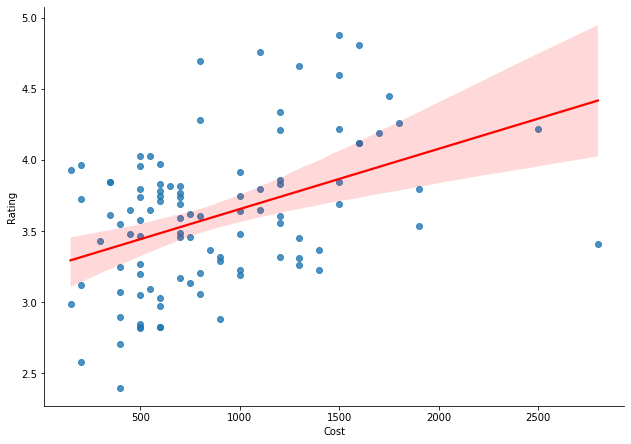

In [ ]:
df_cluster['Cost'] = df_cluster['Cost'].astype('float')
sns.lmplot(y='Rating', x='Cost', data=df_cluster, line_kws={'color' :'red'}, height=6.27, aspect=11.7/8.27)

#### We can see some kind of a positive correlation bw cost and rating

## K-Means Clustering

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

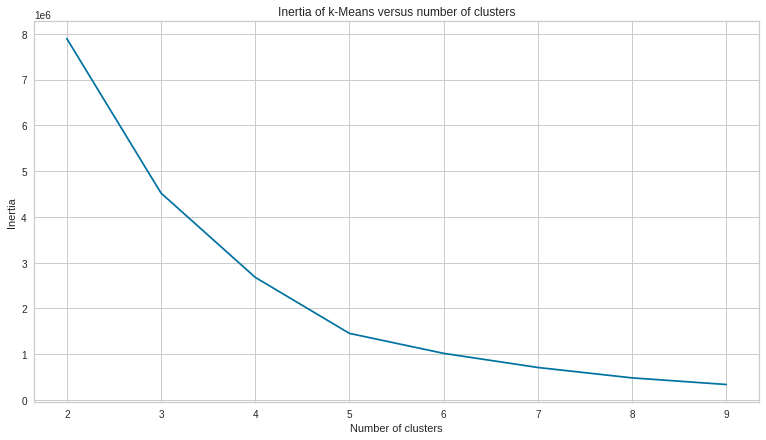

In [ ]:
scores = [KMeans(n_clusters=i+2, random_state=11).fit(df_cluster.drop(['Name', 'Restaurant'],axis =1)).inertia_ for i in range(8)]
plt.figure(figsize=(13,7))
sns.lineplot(np.arange(2, 10), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

#### From the above chart it seems that cluster 5 is best.

In [ ]:
model = KMeans(random_state=11, n_clusters=5)
model.fit(df_cluster.drop(['Name', 'Restaurant'],axis=1))

KMeans(n_clusters=5, random_state=11)

In [ ]:
cluster_lbl = model.predict(df_cluster.drop(['Name', 'Restaurant'],axis=1))

Text(0.5, 0, 'Cost')

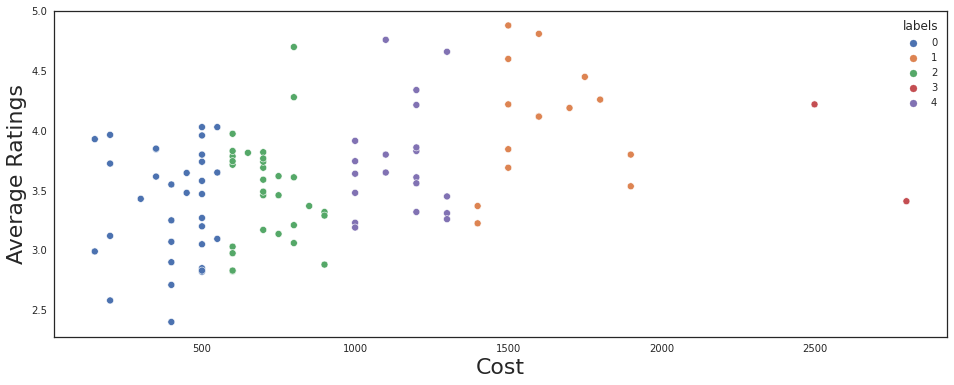

In [ ]:
df_cluster['labels'] = cluster_lbl
plt.figure(figsize = (16,6))
sns.set_style('white')
sns.scatterplot(y='Rating',x='Cost',data=df_cluster,hue='labels', palette = 'deep')
plt.ylabel('Average Ratings',fontdict={'size':22})
plt.xlabel('Cost',fontdict={'size':22})

#### As seen from above plot Restaurants have clustered well across the cost.

In [ ]:
cluster_0 = df_cluster[df_cluster['labels'] == 0].reset_index()
cluster_1 = df_cluster[df_cluster['labels'] == 1].reset_index()
cluster_2 = df_cluster[df_cluster['labels'] == 2].reset_index()
cluster_3 = df_cluster[df_cluster['labels'] == 3].reset_index()
cluster_4 = df_cluster[df_cluster['labels'] == 4].reset_index()

In [ ]:
list_of_cluster=[cluster_0,cluster_1,cluster_2,cluster_3,cluster_4]

In [ ]:
# Top cuisines in each cluster
for i,df in enumerate(list_of_cluster):
  print(f'Top cuisines in cluster {i}\n', df.drop(['index','Name','Cost','Rating','labels','Restaurant'],axis=1).sum().sort_values(ascending=False)[:3],'\n')

Top cuisines in cluster 0
 northindian                      3
icecreamdesserts                 2
southindiannorthindianchinese    2
dtype: int64 

Top cuisines in cluster 1
 northindianchinesecontinental    2
american                         1
asiansushi                       1
dtype: int64 

Top cuisines in cluster 2
 northindianchinese                           2
cafedessertsfastfood                         1
biryaninorthindianchineseseafoodbeverages    1
dtype: int64 

Top cuisines in cluster 3
 modernindianasiancontinentalitalian          1
continentalitaliannorthindianchineseasian    1
american                                     0
dtype: int64 

Top cuisines in cluster 4
 northindianitalianfingerfood            1
northindianmediterraneaneuropean        1
northindiancontinentalchineseitalian    1
dtype: int64 



#### Here we can see that NorthIndian and Chinese are the prominent cuisines across all clusters.

## Principal Component Analysis(PCA)

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df_cluster.drop(['Name', 'Restaurant'],axis =1))

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)

In [ ]:
X_pca = pca.fit_transform(X)

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

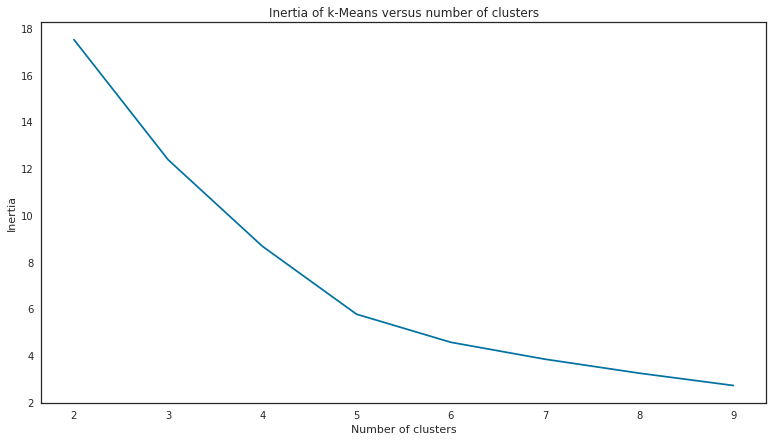

In [ ]:
scores1 = [KMeans(n_clusters=i+2, random_state=11).fit(X_pca).inertia_ 
          for i in range(8)]
plt.figure(figsize=(13,7))
sns.lineplot(np.arange(2, 10), scores1)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

#### From above chart we can say that number of clusters can be 5

In [ ]:
model1 = KMeans(random_state=11, n_clusters=5)
model1.fit(X_pca)

KMeans(n_clusters=5, random_state=11)

In [ ]:
cluster_labels = model1.predict(X_pca)

Text(0.5, 0, 'PC1')

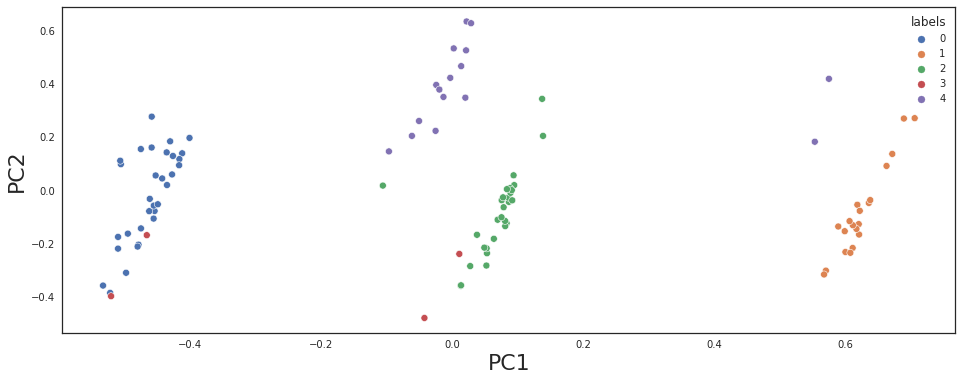

In [ ]:
# Making label column
df_cluster['labels'] = cluster_labels
plt.figure(figsize = (16,6))
sns.set_style('white')
sns.scatterplot(y=X_pca[:,1],x=X_pca[:,0],data=df_cluster,hue='labels', palette = 'deep')
plt.ylabel('PC2',fontdict={'size':22})
plt.xlabel('PC1',fontdict={'size':22})

In [ ]:
df_0 = df_cluster[df_cluster['labels'] == 0].reset_index()
df_1 = df_cluster[df_cluster['labels'] == 1].reset_index()
df_2 = df_cluster[df_cluster['labels'] == 2].reset_index()
df_3 = df_cluster[df_cluster['labels'] == 3].reset_index()
df_4 = df_cluster[df_cluster['labels'] == 4].reset_index()

In [ ]:
list_of_df = [df_0,df_1,df_2,df_3,df_4]

In [ ]:
# Most Prominent cuisines in each cluster(Top 5)
for i,df in enumerate(list_of_df):
  print(f'Top Cuisines in Cluster {i} \n', df.drop(['index','Name','Cost','Rating','labels','Restaurant'],axis = 1).sum().sort_values(ascending=False)[:3],'\n')

Top Cuisines in Cluster 0 
 northindian                      3
icecreamdesserts                 2
southindiannorthindianchinese    2
dtype: int64 

Top Cuisines in Cluster 1 
 northindianitalianfingerfood            1
northindianmediterraneaneuropean        1
northindiancontinentalchineseitalian    1
dtype: int64 

Top Cuisines in Cluster 2 
 cafedessertsfastfood      1
northindiancontinental    1
cafedesserts              1
dtype: int64 

Top Cuisines in Cluster 3 
 northindianchinese                     4
american                               0
modernindianasiancontinentalitalian    0
dtype: int64 

Top Cuisines in Cluster 4 
 northindianchinesecontinental       2
american                            1
mediterraneannorthindiankebabbbq    1
dtype: int64 



#### Here We can see that cuisines are well differentiated amongst clusters, as compared to unscaled data